# Abstract

The aim of this notebook is to perform an exhaustive data exploration on the iPinYou dataset. We start with some very general statistical information of the variables and then proceed to study each variable with respect to CTR, Cost and CPC. Afterwards, we experiment with feature engineering and also explore the new features to see if they seem like stronger predictors.

# Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import time

%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
start = time.time()

In [83]:
train = pd.read_csv("train.csv")
validation = pd.read_csv("validation.csv")
test = pd.read_csv("test.csv")

In [84]:
train.shape, validation.shape, test.shape

((2430981, 25), (303925, 25), (303375, 22))

In [5]:
train.head()

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,domain,url,urlid,slotid,slotwidth,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,5,22,b7bea80521fdecd95d2d761a38c91c3f09618066,2e880fb7d690cf7377b2e42e701728e3f3c0e4c1,windows_ie,125.37.175.*,2,2,2.0,trqRTvKaXTKfgg24JKTI,6447a7dfa30fe6eb410c91860e7c9b45,NaN,2015392487,200,200,2,0,5,a4f763f78ef3eedfe614263b94a8924e,238,5,0f951a030abdaedd733ee8d114ce2944,3427,NaN
1,0,1,20,4f51205475678f5a124bc76b2c54163bf8eaa7eb,3a1fe01360ff8100e7d006b83b77a3e4c01d928c,windows_chrome,171.36.92.*,238,239,1.0,20fc675468712705dbf5d3eda94126da,3ddf173a94bd23c326683b6373c75dd4,NaN,mm_10982364_973726_8930541,300,250,FourthView,Na,0,10722,294,23,NaN,2821,NaN
2,0,3,13,b604e3fd054a658ab7ced4285ebf2ef54d2bd890,801d18a056b6fe6b06a794aef17fb0d6daff2414,windows_ie,59.46.106.*,40,41,2.0,trqRTJn7O95I1mKYUV,625d1b5916ea925332c7b326c0574cfa,NaN,1720123646,250,250,2,0,5,798b2d49952d77f1eace9f23c210d0b5,238,24,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10006,13866,10110"
3,0,6,23,0348beeae93e561584c3b50fc9e7746a33048ad7,0d6eaf2259699990e38a1fc5116f112070b9ecdc,windows_ie,114.250.226.*,1,1,1.0,5F97t5E0BTK7XhNrUMpENpn,dedc488b98ca20707bc9a723957e7d1f,NaN,mm_10027070_118039_10308280,160,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,25,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111"
4,0,5,6,268149c1789bce2bc9798ffd97ec431219bafeb3,a239d9bb642460d974ba67f85e63b8d3e214da0e,windows_ie,183.63.192.*,216,233,2.0,13625cb070ffb306b425cd803c4b7ab4,4199d1227c511fc776b76594dabff9f8,NaN,1120200150,728,90,OtherView,Na,133,7330,277,133,NaN,2259,NaN


In [6]:
train.columns

Index(['click', 'weekday', 'hour', 'bidid', 'userid', 'useragent', 'IP',
       'region', 'city', 'adexchange', 'domain', 'url', 'urlid', 'slotid',
       'slotwidth', 'slotheight', 'slotvisibility', 'slotformat', 'slotprice',
       'creative', 'bidprice', 'payprice', 'keypage', 'advertiser', 'usertag'],
      dtype='object')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430981 entries, 0 to 2430980
Data columns (total 25 columns):
click             int64
weekday           int64
hour              int64
bidid             object
userid            object
useragent         object
IP                object
region            int64
city              int64
adexchange        float64
domain            object
url               object
urlid             float64
slotid            object
slotwidth         int64
slotheight        int64
slotvisibility    object
slotformat        object
slotprice         int64
creative          object
bidprice          int64
payprice          int64
keypage           object
advertiser        int64
usertag           object
dtypes: float64(2), int64(11), object(12)
memory usage: 463.7+ MB


### Null values

In [87]:
train.isnull().sum() * 100 / train.shape[0]

click               0.000000
weekday             0.000000
hour                0.000000
bidid               0.000000
userid              0.000000
useragent           0.000000
IP                  0.000000
region              0.000000
city                0.000000
adexchange          2.049749
domain              5.641138
url                 3.571069
urlid             100.000000
slotid              0.000000
slotwidth           0.000000
slotheight          0.000000
slotvisibility      0.000000
slotformat          0.000000
slotprice           0.000000
creative            0.000000
bidprice            0.000000
payprice            0.000000
keypage            20.773095
advertiser          0.000000
usertag            20.464125
dtype: float64

In [91]:
train["slotvisibility"].str.match("Na").sum() * 100/train.shape[0]

7.1961072505297246

In [92]:
train["slotformat"].str.match("Na").sum() * 100/train.shape[0]

20.773095305969072

In [9]:
# Unique values per feature
df_unique = pd.DataFrame(columns = ["Column", "Unique Values"])
df_unique["Column"] = train.columns
df_unique["Unique Values"] = [len(train[col].unique()) for col in train.columns]
df_unique

,Column,Unique Values
0,click,2
1,weekday,7
2,hour,24
3,bidid,2430981
4,userid,2342677
5,useragent,38
6,IP,503975
7,region,35
8,city,370
9,adexchange,5


# Aggregated Statistics

In [10]:
def Aggregated_CTR(df, by = "weekday"):
    
    """
    Computes aggregated CTR (and Cost and CPC) per feature.
    """
    
    feat = df[by].unique()
    res = pd.DataFrame(columns = [by, "CTR", "Cost", "CPC"])
    i = 0
    
    for f in feat:
        
        df_ = df.loc[df[by] == f]
        
        # Number of impressions
        impr = df_.shape[0]

        # Number of clicks
        clicks = df_["click"].sum()

        # CTR
        ctr = clicks*100/impr
        
        # Cost
        cost = df_["payprice"].mean()
        
        # CPC
        if clicks > 0:
            cpc = df_["payprice"].sum() / clicks /  1000
        else:
            cpc = 0
        
        # Store results to dataframe
        res.loc[i] = [f, ctr, cost, cpc]
        i+=1
        
    return res

### Weekday

In [11]:
data_weekday = Aggregated_CTR(train, "weekday")
data_weekday["weekday"] = data_weekday["weekday"].map(lambda x: int(x))
data_weekday.sort_values(by = "weekday")

,weekday,CTR,Cost,CPC
6,0,0.064377,76.502512,118.834373
1,1,0.067633,82.259322,121.626189
5,2,0.096479,80.043588,82.964899
2,3,0.083327,76.536456,91.851049
4,4,0.080977,77.657396,95.900413
0,5,0.072510,79.802179,110.056575
3,6,0.056909,74.518796,130.943425


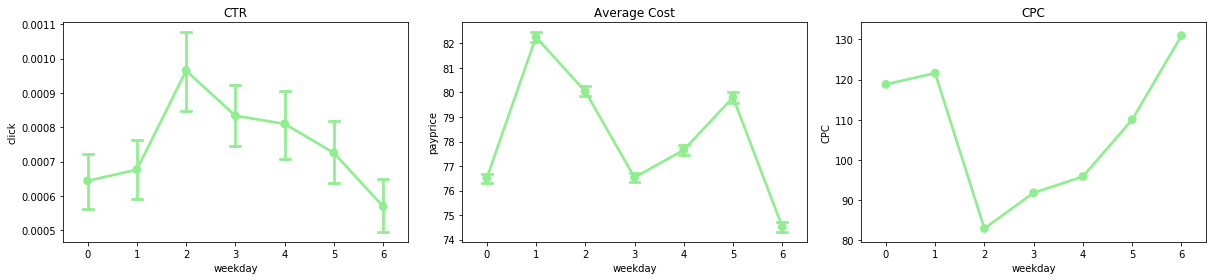

In [12]:
plt.figure(figsize = (17,4))

plt.subplot(1,3,1)
sns.pointplot(x = "weekday", y = "click", data = train, color = "lightgreen", capsize = 0.2)
plt.ylabel("")
plt.title("CTR")

plt.subplot(1,3,2)
sns.pointplot(x = "weekday", y = "payprice", data = train, color = "lightgreen", capsize = 0.2)
plt.ylabel("")
plt.title("Average Cost")

plt.subplot(1,3,3)
sns.pointplot(x = "weekday", y = "CPC", data = data_weekday, color = "lightgreen", capsize = 0.2)
plt.ylabel("")
plt.title("CPC")

plt.tight_layout()

### Hour

In [13]:
data_hour = Aggregated_CTR(train, "hour")
data_hour["hour"] = data_hour["hour"].map(lambda x: int(x))
data_hour.sort_values(by = "hour")

,hour,CTR,Cost,CPC
9,0,0.068863,87.329205,126.815607
13,1,0.054698,70.073362,128.108970
12,2,0.066936,66.379005,99.167348
21,3,0.045282,67.904999,149.961400
22,4,0.063580,68.633994,107.949833
19,5,0.080536,70.662707,87.741000
4,6,0.026034,74.542023,286.328333
23,7,0.068832,76.922155,111.753469
18,8,0.044800,80.342891,179.338290
20,9,0.050971,75.850399,148.809452


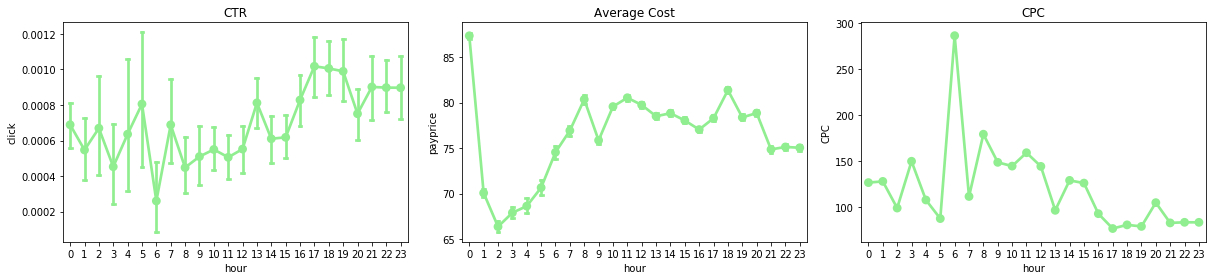

In [14]:
plt.figure(figsize = (17,4))

plt.subplot(1,3,1)
sns.pointplot(x = "hour", y = "click", data = train, color = "lightgreen", capsize = 0.2)
plt.ylabel("")
plt.title("CTR")

plt.subplot(1,3,2)
sns.pointplot(x = "hour", y = "payprice", data = train, color = "lightgreen", capsize = 0.2)
plt.ylabel("")
plt.title("Average Cost")

plt.subplot(1,3,3)
sns.pointplot(x = "hour", y = "CPC", data = data_hour, color = "lightgreen", capsize = 0.2)
plt.ylabel("")
plt.title("CPC")

plt.tight_layout()

Tuesday (or Wednesday) seems the most productive day of the week. Evening seems to be the most productive part of the day (17:00 - 19:00 and until 23:00). Seems kind of justified: Maybe people after having finished their work or uni, are more relaxed and maybe even search for goods to buy, so it is more probable to click an advertisement. However, a question would be is this true for every day of the week (e.g. is evening the most productive part of the day for all weekdays)? In addition to that, based on the specific part of the day, which day is the most productive? Let's create some FacetGrids to check these things...

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


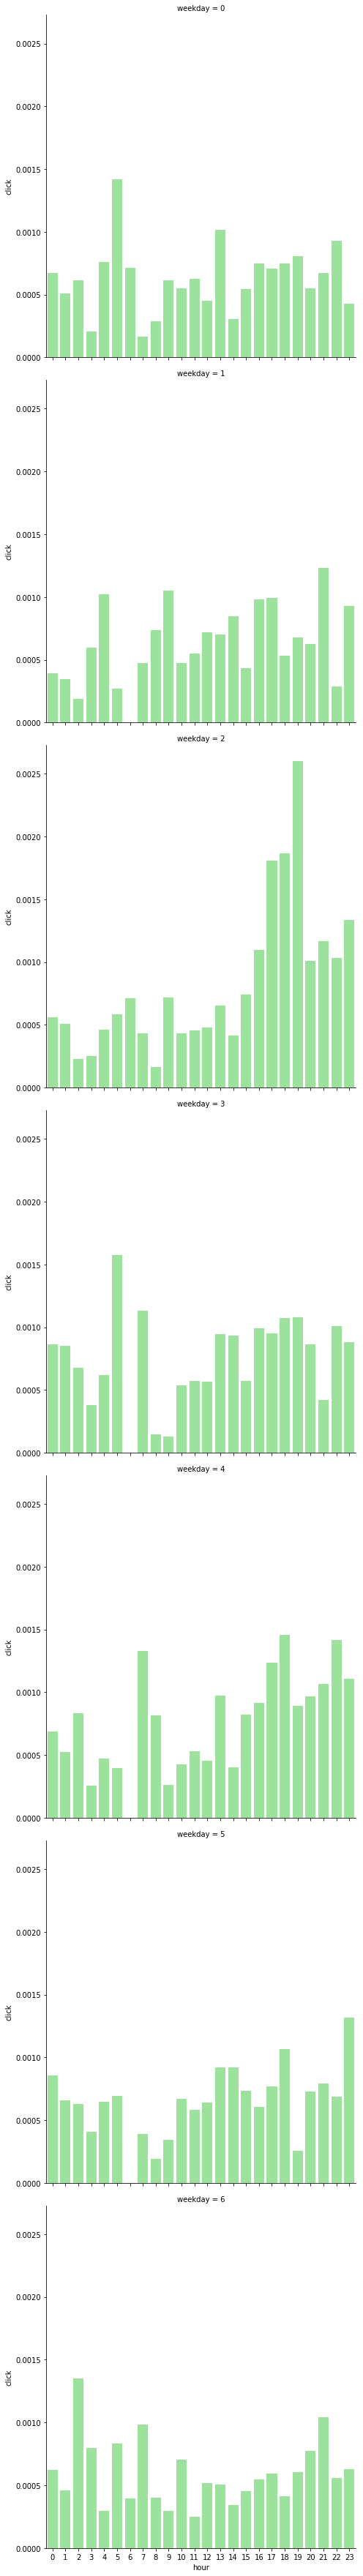

In [15]:
g = sns.FacetGrid(train, row = "weekday", size = 7)
g = g.map(sns.barplot, "hour", "click", color = "lightgreen", ci = None)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


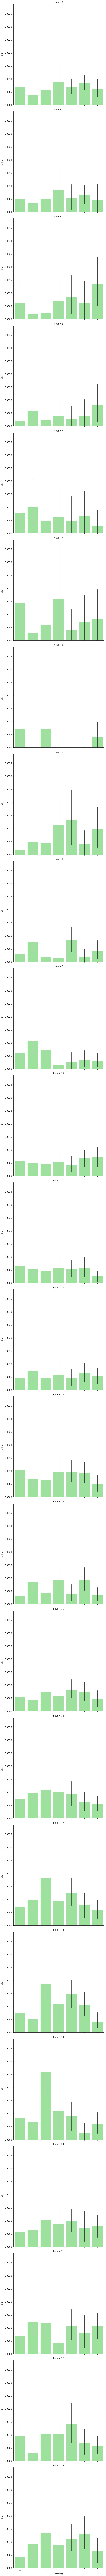

In [16]:
g = sns.FacetGrid(train, row = "hour", size = 7)
g = g.map(sns.barplot, "weekday", "click", color = "lightgreen")

As can be seen, CTR presents different behavior for different parts of the day for different weekdays. That might indicate , that it worths creating a new feature which will indicate weekday and part of the day, e.g. Monday_Morning, Monday_Afternoon, Monday_Night etc...

### Slotvisibility

In [17]:
data_slotvisibility = Aggregated_CTR(train, "slotvisibility")
data_slotvisibility.sort_values(by = "slotvisibility")

,slotvisibility,CTR,Cost,CPC
3,0,0.069284,73.709101,106.387402
4,1,0.125966,94.404337,74.944042
0,2,0.050697,70.756781,139.566985
8,255,0.067728,82.504515,121.817917
9,FifthView,0.000000,94.796000,0.000000
6,FirstView,0.183069,72.310238,39.498912
1,FourthView,0.022036,104.826906,475.704500
5,Na,0.057735,100.880173,174.728455
2,OtherView,0.036099,85.886590,237.917837
7,SecondView,0.035287,77.531678,219.717727


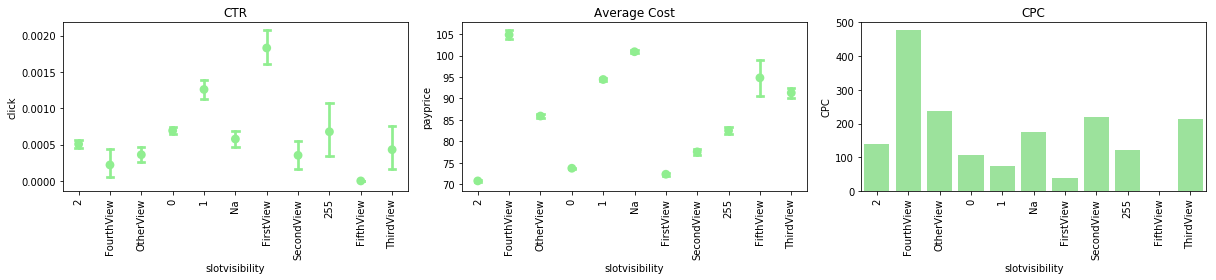

In [18]:
plt.figure(figsize = (17,4))

plt.subplot(1,3,1)
sns.pointplot(x = "slotvisibility", y = "click", data = train, color = "lightgreen", capsize = 0.2, join = False)
plt.xticks(rotation = 90)
plt.ylabel("")
plt.title("CTR")

plt.subplot(1,3,2)
sns.pointplot(x = "slotvisibility", y = "payprice", data = train, color = "lightgreen", capsize = 0.2, join = False)
plt.xticks(rotation = 90)
plt.ylabel("")
plt.title("Average Cost")

plt.subplot(1,3,3)
sns.barplot(x = "slotvisibility", y = "CPC", data = data_slotvisibility, color = "lightgreen", capsize = 0.2)
plt.xticks(rotation = 90)
plt.ylabel("")
plt.title("CPC")

plt.tight_layout()

### Region

In [19]:
data_region = Aggregated_CTR(train, "region")
data_region["region"] = data_region["region"].map(lambda x: int(x))
data_region.sort_values(by = "region")

,region,CTR,Cost,CPC
20,0,0.083031,73.064880,87.997302
3,1,0.082041,77.787963,94.816119
0,2,0.076933,78.242923,101.702310
23,3,0.077413,78.253684,101.086060
7,15,0.111014,78.676314,70.870500
14,27,0.079816,78.393653,98.217840
2,40,0.051624,76.741414,148.655429
11,55,0.058565,75.647793,129.168607
28,65,0.073885,78.426222,106.145763
12,79,0.064554,87.936202,136.221756


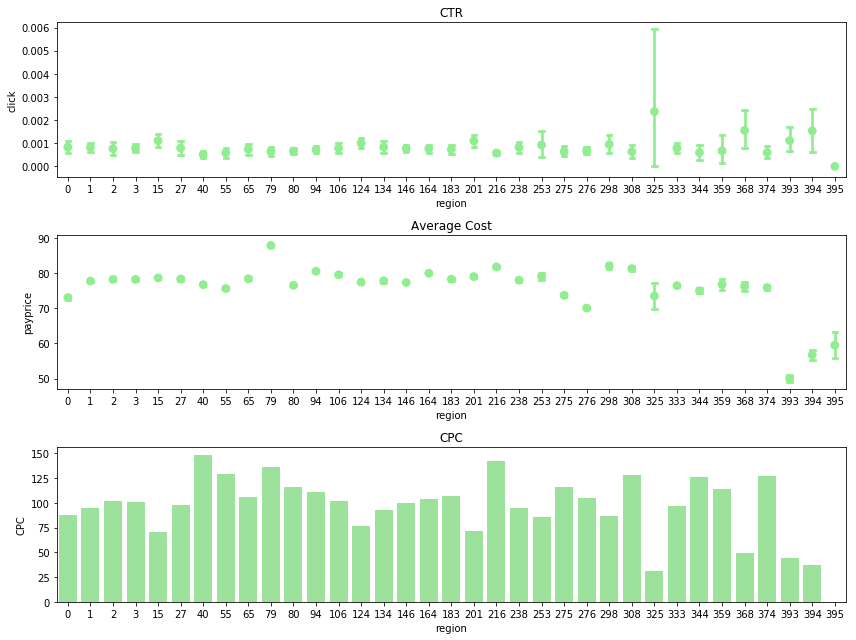

In [20]:
plt.figure(figsize = (12,9))

plt.subplot(3,1,1)
sns.pointplot(x = "region", y = "click", data = train, color = "lightgreen", capsize = 0.2, join = False)
plt.ylabel("")
plt.title("CTR")

plt.subplot(3,1,2)
sns.pointplot(x = "region", y = "payprice", data = train, color = "lightgreen", capsize = 0.2, join = False)
plt.ylabel("")
plt.title("Average Cost")

plt.subplot(3,1,3)
sns.barplot(x = "region", y = "CPC", data = data_region, color = "lightgreen", capsize = 0.2)
plt.ylabel("")
plt.title("CPC")

plt.tight_layout()

### City

In [21]:
data_city = Aggregated_CTR(train, "city")
data_city["city"] = data_city["city"].map(lambda x: int(x))
data_city

,city,CTR,Cost,CPC
0,2,0.076933,78.242923,101.702310
1,239,0.088671,78.850303,88.924588
2,41,0.100413,76.459891,76.145556
3,1,0.082041,77.787963,94.816119
4,233,0.047487,86.357842,181.855222
5,277,0.067343,71.596923,106.317091
6,89,0.098814,80.878882,81.849429
7,19,0.118203,78.748522,66.621250
8,342,0.031172,72.998130,234.178000
9,309,0.076575,79.747859,104.143455


In [22]:
ctr_city = Aggregated_CTR(train, "city")
ctr_city.sort_values(["CTR"], ascending = False)

,city,CTR,Cost,CPC
286,373.0,0.691563,79.578147,11.507000
307,361.0,0.485437,76.480583,15.755000
350,326.0,0.378072,71.540643,18.922500
297,21.0,0.275103,78.303989,28.463500
190,119.0,0.244598,79.617611,32.550333
324,195.0,0.235294,77.320588,32.861250
225,131.0,0.230061,82.146472,35.706333
70,132.0,0.228833,80.508663,35.182286
301,68.0,0.223514,79.926688,35.759200
354,255.0,0.212766,81.317021,38.219000


### Ad Exchange

In [24]:
data_adexchange = Aggregated_CTR(train, "adexchange")
#data_adexchange["adexchange"] = data_adexchange["adexchange"].map(lambda x: int(x))
data_adexchange

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:22: RuntimeWarning: invalid value encountered in long_scalars


,adexchange,CTR,Cost,CPC
0,2.0,0.050561,77.650398,153.576394
1,1.0,0.081863,91.553000,111.836505
2,3.0,0.068826,69.632767,101.172213
3,4.0,0.047503,59.426964,125.101579
4,NaN,NaN,NaN,0.000000


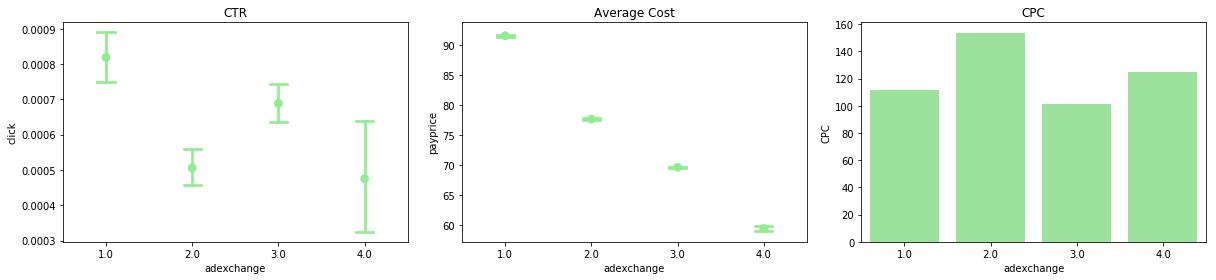

In [25]:
plt.figure(figsize = (17,4))

plt.subplot(1,3,1)
sns.pointplot(x = "adexchange", y = "click", data = train, color = "lightgreen", capsize = 0.2, join = False)
plt.ylabel("")
plt.title("CTR")

plt.subplot(1,3,2)
sns.pointplot(x = "adexchange", y = "payprice", data = train, color = "lightgreen", capsize = 0.2, join = False)
plt.ylabel("")
plt.title("Average Cost")

plt.subplot(1,3,3)
sns.barplot(x = "adexchange", y = "CPC", data = data_adexchange, color = "lightgreen", capsize = 0.2)
plt.ylabel("")
plt.title("CPC")

plt.tight_layout()

### Domain

In [26]:
print("Feature domain has {} unique values which represents {}% of total values".format(len(train.domain.unique()),
                                                                                        len(train.domain.unique())*100/train.shape[0]))

Feature domain has 23013 unique values which represents 0.9466548689603086% of total values


### Slotformat

In [27]:
data_slotformat = Aggregated_CTR(train, "slotformat")
data_slotformat

,slotformat,CTR,Cost,CPC
0,0,0.061737,69.393989,112.402560
1,Na,0.084556,87.643969,103.651822
2,1,0.074327,88.488353,119.053416
3,5,0.927086,148.688466,16.038261


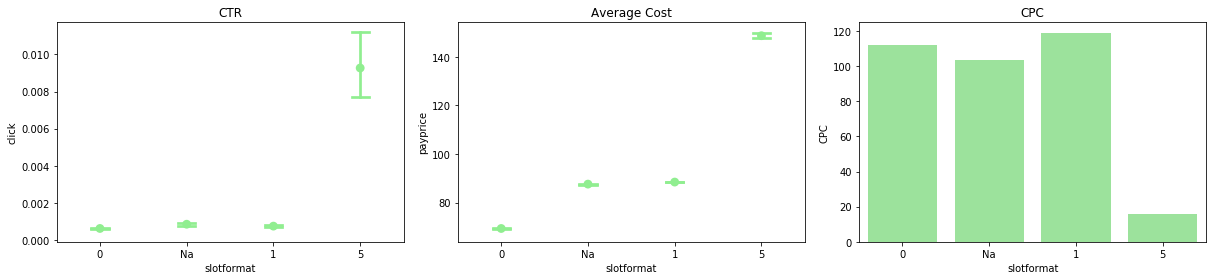

In [28]:
plt.figure(figsize = (17,4))

plt.subplot(1,3,1)
sns.pointplot(x = "slotformat", y = "click", data = train, color = "lightgreen", capsize = 0.2, join = False)
plt.ylabel("")
plt.title("CTR")

plt.subplot(1,3,2)
sns.pointplot(x = "slotformat", y = "payprice", data = train, color = "lightgreen", capsize = 0.2, join = False)
plt.ylabel("")
plt.title("Average Cost")

plt.subplot(1,3,3)
sns.barplot(x = "slotformat", y = "CPC", data = data_slotformat, color = "lightgreen", capsize = 0.2)
plt.ylabel("")
plt.title("CPC")

plt.tight_layout()

### Slotprice

In [29]:
train.loc[train["slotprice"] == train["payprice"]].shape

(537951, 25)

In [30]:
# Percentage of auctions with only 1 bidder
train.loc[train["slotprice"] == train["payprice"]].shape[0]*100 / train.shape[0]

22.128967688352972

In [31]:
len(train["slotprice"].unique())

286

### Advertiser

In [32]:
data_advertiser = Aggregated_CTR(train, "advertiser")
data_advertiser["advertiser"] = data_advertiser["advertiser"].map(lambda x: int(x))
data_advertiser

,advertiser,CTR,Cost,CPC
0,3427,0.067526,75.616329,111.980555
1,2821,0.061978,89.077922,143.725527
2,1458,0.078196,68.992646,88.230483
3,2259,0.032168,92.974931,289.028791
4,3386,0.070323,76.766320,109.161947
5,3358,0.076239,84.720599,111.124906
6,3476,0.060161,76.950083,127.907909
7,2261,0.032691,89.662184,274.271639
8,2997,0.435489,62.800116,14.420585


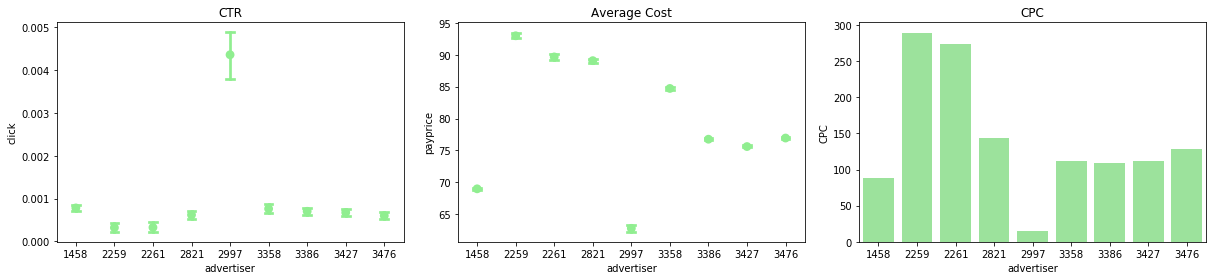

In [33]:
plt.figure(figsize = (17,4))

plt.subplot(1,3,1)
sns.pointplot(x = "advertiser", y = "click", data = train, color = "lightgreen", capsize = 0.2, join = False)
plt.ylabel("")
plt.title("CTR")

plt.subplot(1,3,2)
sns.pointplot(x = "advertiser", y = "payprice", data = train, color = "lightgreen", capsize = 0.2, join = False)
plt.ylabel("")
plt.title("Average Cost")

plt.subplot(1,3,3)
sns.barplot(x = "advertiser", y = "CPC", data = data_advertiser, color = "lightgreen", capsize = 0.2)
plt.ylabel("")
plt.title("CPC")

plt.tight_layout()

### Creative

Definition: A brief description about a service or product that the advertiser wishes to promote.

In [34]:
len(train.creative.unique())

131

In [35]:
data_advertiser = Aggregated_CTR(train, "advertiser")
data_advertiser["advertiser"] = data_advertiser["advertiser"].map(lambda x: int(x))
data_advertiser

,advertiser,CTR,Cost,CPC
0,3427,0.067526,75.616329,111.980555
1,2821,0.061978,89.077922,143.725527
2,1458,0.078196,68.992646,88.230483
3,2259,0.032168,92.974931,289.028791
4,3386,0.070323,76.766320,109.161947
5,3358,0.076239,84.720599,111.124906
6,3476,0.060161,76.950083,127.907909
7,2261,0.032691,89.662184,274.271639
8,2997,0.435489,62.800116,14.420585


In [36]:
data_creative = Aggregated_CTR(train, "creative")
data_creative

,creative,CTR,Cost,CPC
0,a4f763f78ef3eedfe614263b94a8924e,0.024492,51.190056,209.009000
1,10722,0.068959,103.921603,150.699796
2,798b2d49952d77f1eace9f23c210d0b5,0.043840,54.012275,123.202000
3,cb7c76e7784031272e37af8e7e9b062c,0.087513,71.958776,82.225915
4,7330,0.015443,84.794811,549.074667
5,77819d3e0b3467fe5c7b16d68ad923a1,0.063888,68.648014,107.450294
6,86c2543527c86a893d4d4f68810a0416,0.061828,63.895773,103.344859
7,832b91d59d0cb5731431653204a76c0e,0.075896,65.005042,85.650257
8,a10c31a8ff5f42930b4c34035e523886,0.099865,71.878189,71.975225
9,00fccc64a1ee2809348509b7ac2a97a5,0.067674,81.035364,119.743256


Text(0.5,0,'CTR')

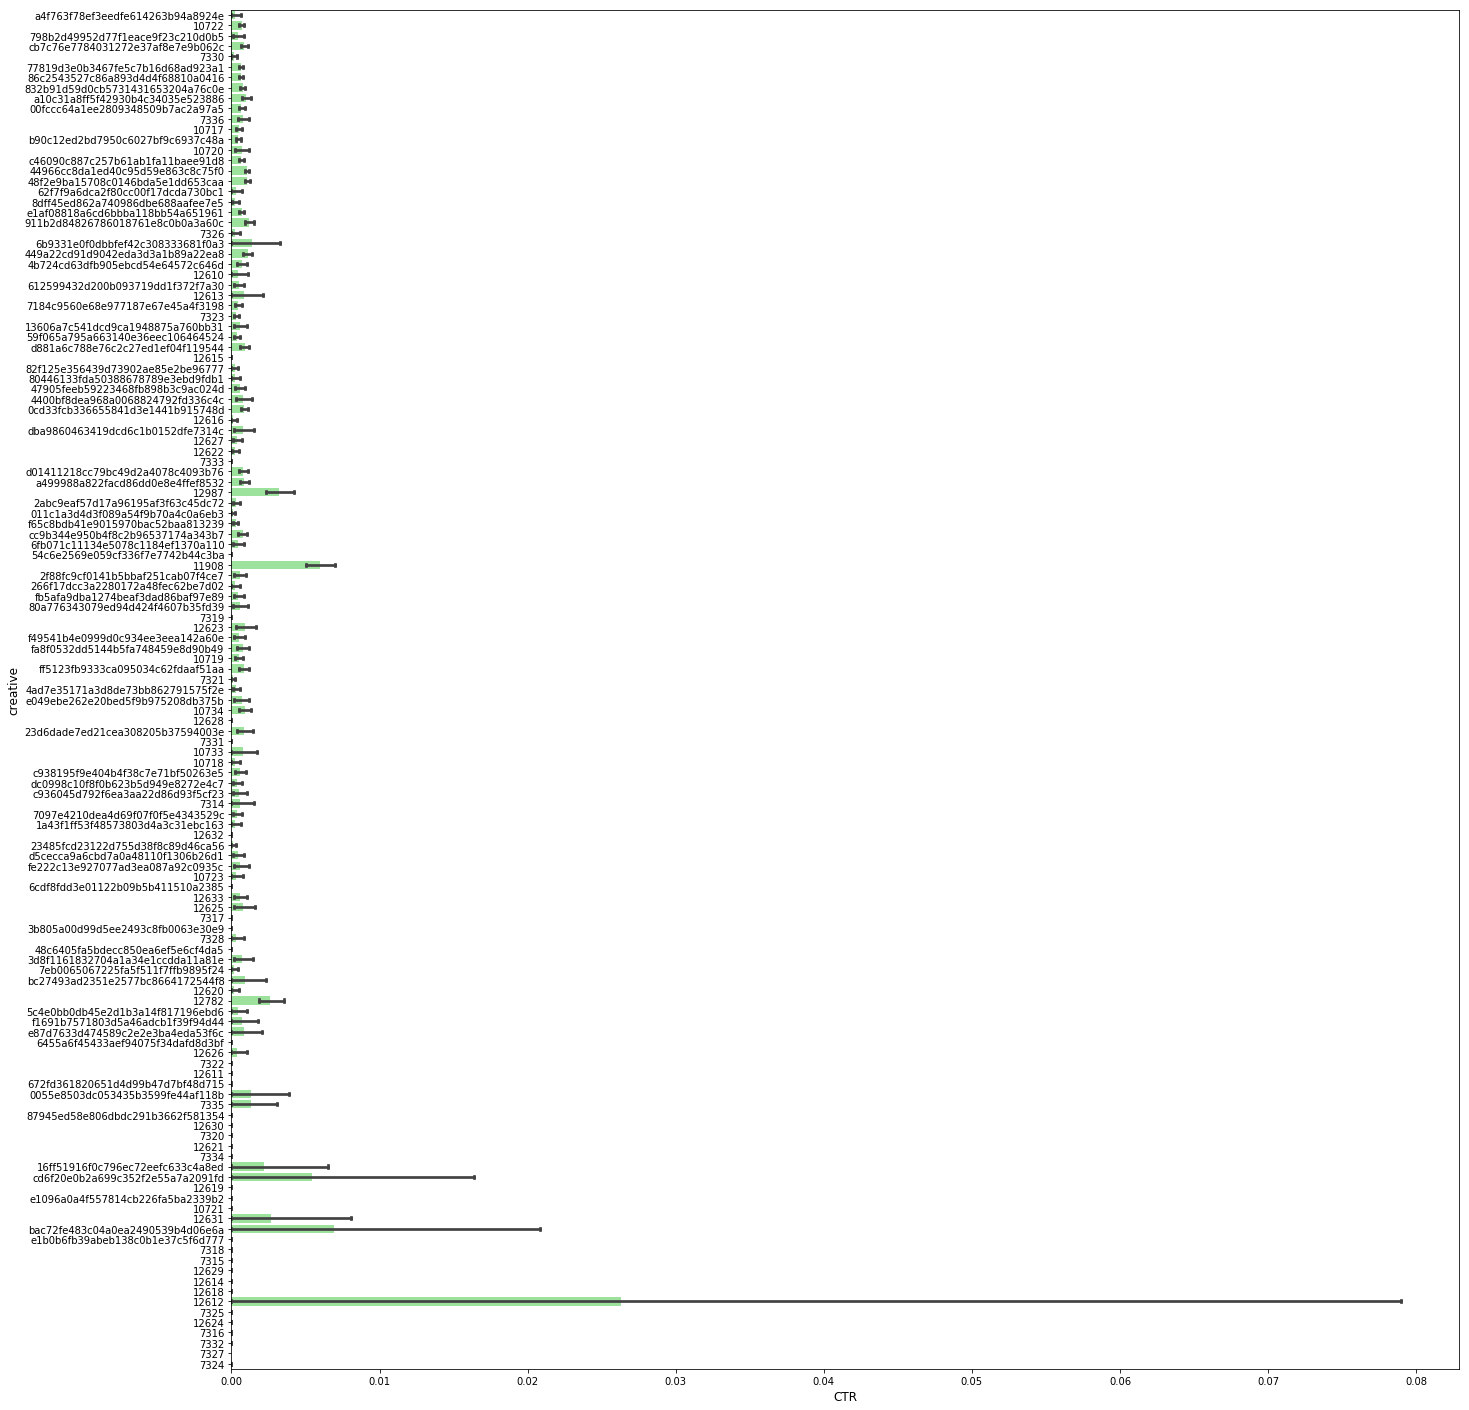

In [37]:
plt.figure(figsize = (22,25))
sns.barplot(y = "creative", x = "click", data = train, color = "lightgreen", capsize = 0.2)
plt.ylabel("creative", fontsize = 12)
plt.xlabel("CTR", fontsize = 12)

### Bidprice vs Payprice

Text(0.5,1,'Payprice')

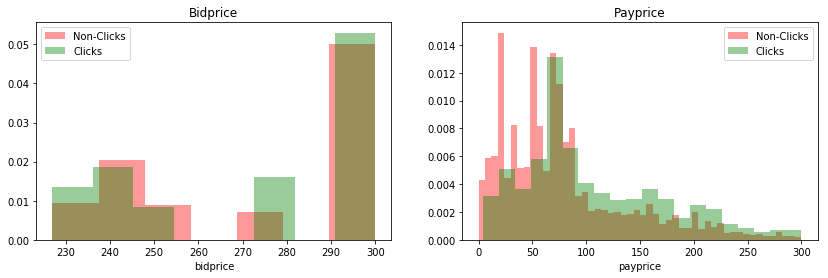

In [38]:
plt.figure(figsize = (14,4))

plt.subplot(1,2,1)
sns.distplot(train.loc[train["click"] == 0, "bidprice"], bins = 7,  norm_hist = True, kde = False, color = "red")
sns.distplot(train.loc[train["click"] == 1, "bidprice"], norm_hist = True, kde = False, color = "green")
plt.legend(["Non-Clicks", "Clicks"])
plt.title("Bidprice")

plt.subplot(1,2,2)
sns.distplot(train.loc[train["click"] == 0, "payprice"], norm_hist = True, kde = False, color = "red")
sns.distplot(train.loc[train["click"] == 1, "payprice"], norm_hist = True, kde = False, color = "green")
plt.legend(["Non-Clicks", "Clicks"])
plt.title("Payprice")

In [41]:
prices = pd.DataFrame(index = ["Impressions", "Clicks"],
                      columns = ["Bidprice", "Payprice"])

prices

,Bidprice,Payprice
Impressions,NaN,NaN
Clicks,NaN,NaN


In [42]:
prices.loc["Impressions"]["Bidprice"] = train.loc[train["click"] == 0, "bidprice"].mean()
prices.loc["Clicks"]["Bidprice"] = train.loc[train["click"] == 1, "bidprice"].mean()
prices.loc["Impressions"]["Payprice"] = train.loc[train["click"] == 0, "payprice"].mean()
prices.loc["Clicks"]["Payprice"] = train.loc[train["click"] == 1, "payprice"].mean()

In [43]:
prices

,Bidprice,Payprice
Impressions,272.962,78.1313
Clicks,273.227,105.464


In [127]:
prices.to_latex("Figures/prices.tex")

## Feature Engineering

In [44]:
def UsertagCategories(df):
    
    # Fill na
    df["usertag"] = df["usertag"].fillna("")  ## not optimal
    
    # Drop nan
    df = df["usertag"].dropna().reset_index(drop = True)
    
    # Find unique usertags
    usertags_list = [df[i].split(",") for i in range(df.shape[0])]
    
    # itertools.chain.from_iterable joins a list of lists into a single list
    usertags = np.unique(list(itertools.chain.from_iterable(usertags_list)))
    
    # Remove the empty string ""
    usertags = [tag for tag in usertags if len(tag) > 0]
    
    return usertags

In [45]:
usertags_train = UsertagCategories(train)

In [46]:
def FeatureEngineering(df):
    
        # Convert numerical to categorical
        df["weekday_cat"] = df["weekday"].map(lambda x: str(x))
        df["hour_cat"] = df["hour"].map(lambda x: str(x))
        df["region_cat"] = df["region"].map(lambda x: str(x))
        df["city_cat"] = df["city"].map(lambda x: str(x))
        df["adexchange_cat"] = df["adexchange"].map(lambda x: str(x))
        df["advertiser_cat"] = df["advertiser"].map(lambda x: str(x))
        
        # Operating system
        df["os"] = df["useragent"].map(lambda x: x.split("_")[0])
        
        # Browser
        df["browser"] = df["useragent"].map(lambda x: x.split("_")[1])
        
        # Slotarea
        df["slotarea"] = df["slotwidth"]*df["slotheight"]   ####.astype("category")
        
        # Part of the day
        df["part_of_the_day"] = ""
        
        df.loc[(df["weekday"] == 0) & (df["hour"] > 0) & (df["hour"] <=8), "part_of_the_day"] = "Sunday_Night"
        df.loc[(df["weekday"] == 0) & (df["hour"] > 8) & (df["hour"] < 17), "part_of_the_day"] = "Sunday_Morning"
        df.loc[(df["weekday"] == 0) & (((df["hour"] >= 17) & (df["hour"] <= 23)) | ((df["hour"] == 0))), "part_of_the_day"] = "Sunday_Evening"
        
        df.loc[(df["weekday"] == 1) & (df["hour"] > 0) & (df["hour"] <=8), "part_of_the_day"] = "Monday_Night"
        df.loc[(df["weekday"] == 1) & (df["hour"] > 8) & (df["hour"] < 17), "part_of_the_day"] = "Monday_Morning"
        df.loc[(df["weekday"] == 1) & (((df["hour"] >= 17) & (df["hour"] <= 23)) | ((df["hour"] == 0))), "part_of_the_day"] = "Monday_Evening"

        
        df.loc[(df["weekday"] == 2) & (df["hour"] > 0) & (df["hour"] <=8), "part_of_the_day"] = "Tuesday_Night"
        df.loc[(df["weekday"] == 2) & (df["hour"] > 8) & (df["hour"] < 17), "part_of_the_day"] = "Tuesday_Morning"
        df.loc[(df["weekday"] == 2) & (((df["hour"] >= 17) & (df["hour"] <= 23)) | ((df["hour"] == 0))), "part_of_the_day"] = "Tuesday_Evening"

        df.loc[(df["weekday"] == 3) & (df["hour"] > 0) & (df["hour"] <=8), "part_of_the_day"] = "Wednesday_Night"
        df.loc[(df["weekday"] == 3) & (df["hour"] > 8) & (df["hour"] < 17), "part_of_the_day"] = "Wednesday_Morning"
        df.loc[(df["weekday"] == 3) & (((df["hour"] >= 17) & (df["hour"] <= 23)) | ((df["hour"] == 0))), "part_of_the_day"] = "Wednesday_Evening"

        df.loc[(df["weekday"] == 4) & (df["hour"] > 0) & (df["hour"] <=8), "part_of_the_day"] = "Tuesday_Night"
        df.loc[(df["weekday"] == 4) & (df["hour"] > 8) & (df["hour"] < 17), "part_of_the_day"] = "Tuesday_Morning"
        df.loc[(df["weekday"] == 4) & (((df["hour"] >= 17) & (df["hour"] <= 23)) | ((df["hour"] == 0))), "part_of_the_day"] = "Tuesday_Evening"

        df.loc[(df["weekday"] == 5) & (df["hour"] > 0) & (df["hour"] <=8), "part_of_the_day"] = "Friday_Night"
        df.loc[(df["weekday"] == 5) & (df["hour"] > 8) & (df["hour"] < 17), "part_of_the_day"] = "Friday_Morning"
        df.loc[(df["weekday"] == 5) & (((df["hour"] >= 17) & (df["hour"] <= 23)) | ((df["hour"] == 0))), "part_of_the_day"] = "Friday_Evening"

        
        df.loc[(df["weekday"] == 6) & (df["hour"] > 0) & (df["hour"] <=8), "part_of_the_day"] = "Saturday_Night"
        df.loc[(df["weekday"] == 6) & (df["hour"] > 8) & (df["hour"] < 17), "part_of_the_day"] = "Saturday_Morning"
        df.loc[(df["weekday"] == 6) & (((df["hour"] >= 17) & (df["hour"] <= 23)) | ((df["hour"] == 0))), "part_of_the_day"] = "Saturday_Evening"
        
        # Slotprice binning
        df["slotprice_cat"] = 0
        
        df.loc[ df["slotprice"] <= 10, "slotprice_cat"] = 0
        df.loc[ (df["slotprice"] > 10) & (df["slotprice"] <= 50), "slotprice_cat"] = 1
        df.loc[ (df["slotprice"] > 50) & (df["slotprice"] <= 100), "slotprice_cat"] = 2
        df.loc[ df["slotprice"] > 100, "slotprice_cat"] = 3

        
        # Usertags
        for tag in usertags_train:
            col_name = "usertag_" + tag
            df[col_name] = df["usertag"].map(lambda x: 1 if tag in x.split(",") else 0)
        
  
        return df

In [47]:
% time train2 = FeatureEngineering(train)

CPU times: user 2min 17s, sys: 4.02 s, total: 2min 21s
Wall time: 2min 21s


In [48]:
train2.columns

Index(['click', 'weekday', 'hour', 'bidid', 'userid', 'useragent', 'IP',
       'region', 'city', 'adexchange',
       ...
       'usertag_13866', 'usertag_13874', 'usertag_14273', 'usertag_15398',
       'usertag_16593', 'usertag_16617', 'usertag_16661', 'usertag_16706',
       'usertag_16751', 'usertag_16753'],
      dtype='object', length=104)

In [49]:
train2.head()

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,domain,url,urlid,slotid,slotwidth,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag,weekday_cat,hour_cat,region_cat,city_cat,adexchange_cat,advertiser_cat,os,browser,slotarea,part_of_the_day,slotprice_cat,usertag_10006,usertag_10024,usertag_10031,usertag_10048,usertag_10052,usertag_10057,usertag_10059,usertag_10063,usertag_10067,usertag_10074,usertag_10075,usertag_10076,usertag_10077,usertag_10079,usertag_10083,usertag_10093,usertag_10102,usertag_10110,usertag_10111,usertag_10114,usertag_10115,usertag_10116,usertag_10117,usertag_10118,usertag_10120,usertag_10123,usertag_10125,usertag_10126,usertag_10127,usertag_10129,usertag_10130,usertag_10131,usertag_10133,usertag_10138,usertag_10140,usertag_10142,usertag_10145,usertag_10146,usertag_10147,usertag_10148,usertag_10149,usertag_10684,usertag_11092,usertag_11278,usertag_11379,usertag_11423,usertag_11512,usertag_11576,usertag_11632,usertag_11680,usertag_11724,usertag_11944,usertag_13042,usertag_13403,usertag_13496,usertag_13678,usertag_13776,usertag_13800,usertag_13866,usertag_13874,usertag_14273,usertag_15398,usertag_16593,usertag_16617,usertag_16661,usertag_16706,usertag_16751,usertag_16753
0,0,5,22,b7bea80521fdecd95d2d761a38c91c3f09618066,2e880fb7d690cf7377b2e42e701728e3f3c0e4c1,windows_ie,125.37.175.*,2,2,2.0,trqRTvKaXTKfgg24JKTI,6447a7dfa30fe6eb410c91860e7c9b45,NaN,2015392487,200,200,2,0,5,a4f763f78ef3eedfe614263b94a8924e,238,5,0f951a030abdaedd733ee8d114ce2944,3427,,5,22,2,2,2.0,3427,windows,ie,40000,Friday_Evening,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,20,4f51205475678f5a124bc76b2c54163bf8eaa7eb,3a1fe01360ff8100e7d006b83b77a3e4c01d928c,windows_chrome,171.36.92.*,238,239,1.0,20fc675468712705dbf5d3eda94126da,3ddf173a94bd23c326683b6373c75dd4,NaN,mm_10982364_973726_8930541,300,250,FourthView,Na,0,10722,294,23,NaN,2821,,1,20,238,239,1.0,2821,windows,chrome,75000,Monday_Evening,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,3,13,b604e3fd054a658ab7ced4285ebf2ef54d2bd890,801d18a056b6fe6b06a794aef17fb0d6daff2414,windows_ie,59.46.106.*,40,41,2.0,trqRTJn7O95I1mKYUV,625d1b5916ea925332c7b326c0574cfa,NaN,1720123646,250,250,2,0,5,798b2d49952d77f1eace9f23c210d0b5,238,24,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10006,13866,10110",3,13,40,41,2.0,3427,windows,ie,62500,Wednesday_Morning,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,6,23,0348beeae93e561584c3b50fc9e7746a33048ad7,0d6eaf2259699990e38a1fc5116f112070b9ecdc,windows_ie,114.250.226.*,1,1,1.0,5F97t5E0BTK7XhNrUMpENpn,dedc488b98ca20707bc9a723957e7d1f,NaN,mm_10027070_118039_10308280,160,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,25,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111",6,23,1,1,1.0,1458,windows,ie,96000,Saturday_Evening,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,5,6,268149c1789bce2bc9798ffd97ec431219bafeb3,a239d9bb642460d974ba67f85e63b8d3e214da0e,windows_ie,183.63.192.*,216,233,2.0,13625cb070ffb306b425cd803c4b7ab4,4199d1227c511fc776b76594dabff9f8,NaN,1120200150,728,90,OtherView,Na,133,7330,277,133,NaN,2259,,5,6,216,233,2.0,2259,windows,ie,65520,Friday_Night,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### OS

In [50]:
data_os = Aggregated_CTR(train2, "os")
data_os

,os,CTR,Cost,CPC
0,windows,0.057238,78.354193,136.891930
1,mac,0.308732,79.458592,25.737068
2,android,0.484781,69.611103,14.359298
3,linux,0.255591,83.231949,32.564500
4,ios,0.769231,78.543590,10.210667
5,other,0.054555,83.319149,152.724000


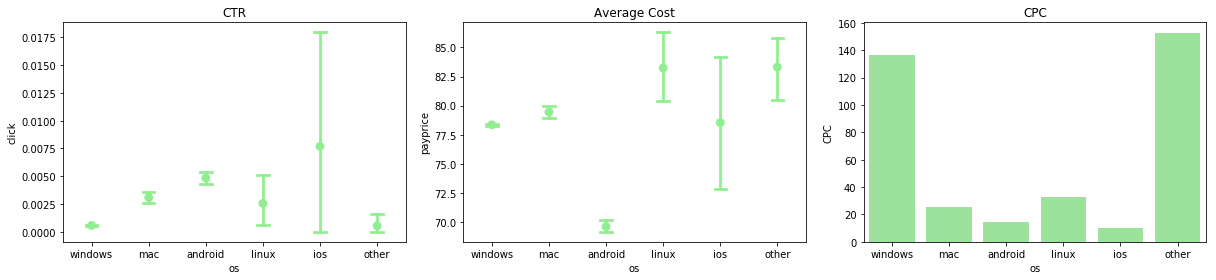

In [51]:
plt.figure(figsize = (17,4))

plt.subplot(1,3,1)
sns.pointplot(x = "os", y = "click", data = train2, color = "lightgreen", capsize = 0.2, join = False)
plt.ylabel("")
plt.title("CTR")

plt.subplot(1,3,2)
sns.pointplot(x = "os", y = "payprice", data = train2, color = "lightgreen", capsize = 0.2, join = False)
plt.ylabel("")
plt.title("Average Cost")

plt.subplot(1,3,3)
sns.barplot(x = "os", y = "CPC", data = data_os, color = "lightgreen", capsize = 0.2)
plt.ylabel("")
plt.title("CPC")

plt.tight_layout()

### Browser

In [52]:
data_browser = Aggregated_CTR(train2, "browser")
data_browser

,browser,CTR,Cost,CPC
0,ie,0.064582,77.235134,119.591733
1,chrome,0.044988,80.799593,179.602866
2,other,0.222400,81.888711,36.820440
3,safari,0.416329,72.098584,17.317703
4,maxthon,0.053440,72.796660,136.220750
5,firefox,0.042751,72.279466,169.068900
6,opera,0.000000,72.285143,0.000000
7,theworld,0.035651,74.402424,208.698800
8,sogou,0.000000,88.419355,0.000000


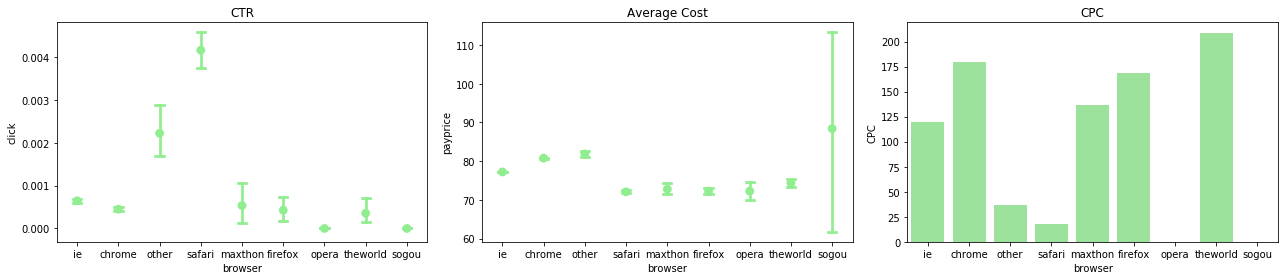

In [53]:
plt.figure(figsize = (18,4))

plt.subplot(1,3,1)
sns.pointplot(x = "browser", y = "click", data = train2, color = "lightgreen", capsize = 0.2, join = False)
plt.ylabel("")
plt.title("CTR")

plt.subplot(1,3,2)
sns.pointplot(x = "browser", y = "payprice", data = train2, color = "lightgreen", capsize = 0.2, join = False)
plt.ylabel("")
plt.title("Average Cost")

plt.subplot(1,3,3)
sns.barplot(x = "browser", y = "CPC", data = data_browser, color = "lightgreen", capsize = 0.2)
plt.ylabel("")
plt.title("CPC")

plt.tight_layout()

### Slotarea

In [54]:
data_slotarea = Aggregated_CTR(train2, "slotarea")
data_slotarea

,slotarea,CTR,Cost,CPC
0,40000.0,0.018284,55.668152,304.469364
1,75000.0,0.082837,98.194263,118.538468
2,62500.0,0.031820,59.409953,186.704028
3,96000.0,0.069057,78.153358,113.171780
4,65520.0,0.061258,75.743601,123.647110
5,94080.0,0.058835,70.894587,120.498029
6,90000.0,0.075188,72.315631,96.180310
7,86400.0,0.047467,50.487401,106.362229
8,108000.0,0.042079,63.002314,149.725000
9,28800.0,0.051881,26.247341,50.591750


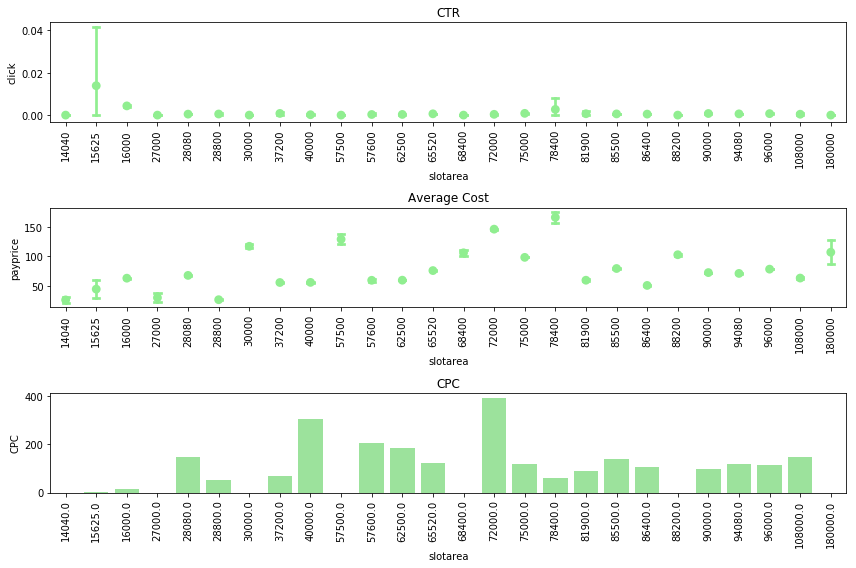

In [55]:
plt.figure(figsize = (12,8))

plt.subplot(3,1,1)
sns.pointplot(x = "slotarea", y = "click", data = train2, color = "lightgreen", capsize = 0.2, join = False)
plt.xticks(rotation = 90)
plt.ylabel("")
plt.title("CTR")

plt.subplot(3,1,2)
sns.pointplot(x = "slotarea", y = "payprice", data = train2, color = "lightgreen", capsize = 0.2, join = False)
plt.xticks(rotation = 90)
plt.ylabel("")
plt.title("Average Cost")

plt.subplot(3,1,3)
sns.barplot(x = "slotarea", y = "CPC", data = data_slotarea, color = "lightgreen", capsize = 0.2)
plt.xticks(rotation = 90)
plt.ylabel("")
plt.title("CPC")

plt.tight_layout()

Slotarea must be used as numerical or categorical variable??

### Part of the day

In [56]:
data_partday = Aggregated_CTR(train2, "part_of_the_day")
data_partday

,part_of_the_day,CTR,Cost,CPC
0,Friday_Evening,0.086364,82.079645,95.038868
1,Monday_Evening,0.070760,82.323901,116.342235
2,Wednesday_Morning,0.071746,74.903924,104.402077
3,Saturday_Evening,0.064819,72.716235,112.183598
4,Friday_Night,0.047175,72.226766,153.104077
5,Tuesday_Evening,0.125265,80.056907,63.909840
6,Friday_Morning,0.069694,80.563522,115.596607
7,Saturday_Morning,0.046482,77.201523,166.087973
8,Sunday_Evening,0.069672,78.471073,112.628550
9,Tuesday_Night,0.054821,74.878578,136.587233


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

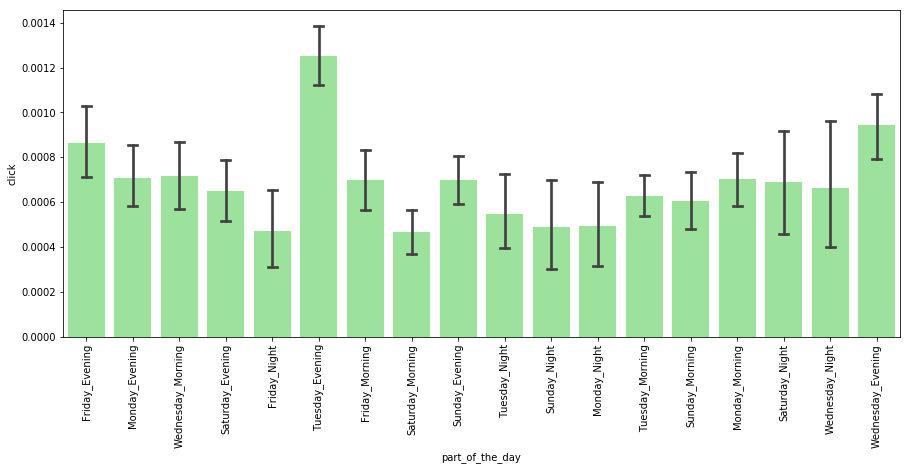

In [57]:
plt.figure(figsize = (15,6))
sns.barplot(x = "part_of_the_day", y = "click", data = train2, color = "lightgreen", capsize = 0.2)
plt.xticks(rotation = 90)

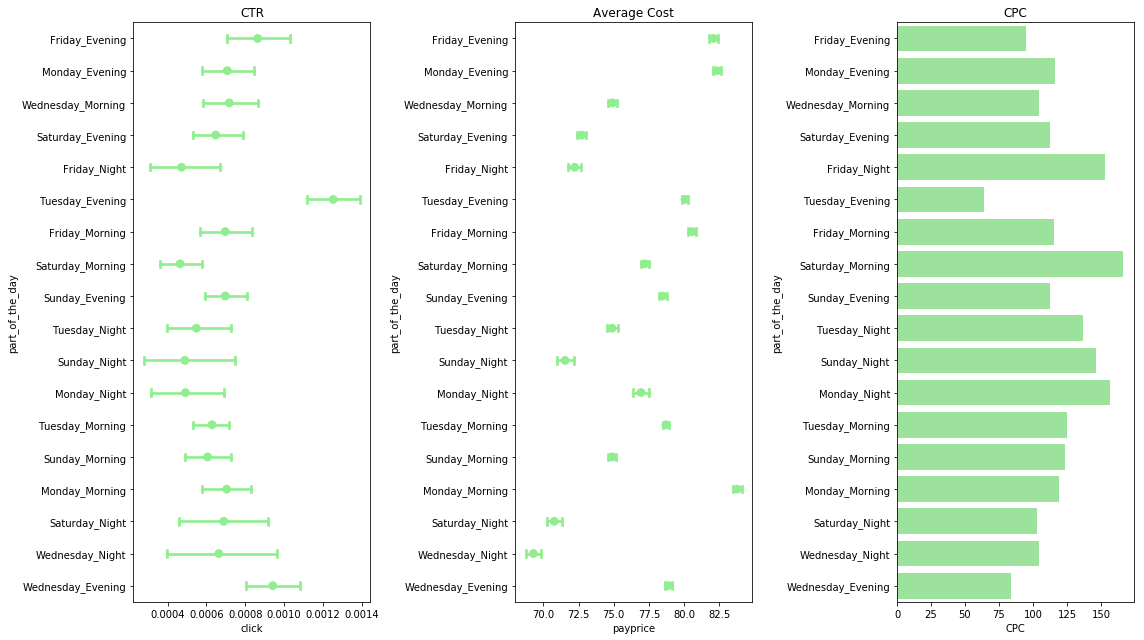

In [58]:
plt.figure(figsize = (16,9))

plt.subplot(1,3,1)
sns.pointplot(y = "part_of_the_day", x = "click", data = train2, color = "lightgreen", capsize = 0.2, join = False)
plt.title("CTR")

plt.subplot(1,3,2)
sns.pointplot(y = "part_of_the_day", x = "payprice", data = train2, color = "lightgreen", capsize = 0.2, join = False)
plt.title("Average Cost")

plt.subplot(1,3,3)
sns.barplot(y = "part_of_the_day", x = "CPC", data = data_partday, color = "lightgreen", capsize = 0.2)
plt.title("CPC")

plt.tight_layout()

### Usertag

In [59]:
len(train2.columns[37:])

67

In [60]:
tags = pd.DataFrame(columns = ["Usertag", "CTR", "Cost", "CPC"])
i = 0

for col in train2.columns[37:]:
    
    impr = train2[col].sum()
    clicks = train2.loc[ (train2[col] == 1) & (train2["click"] == 1) ].shape[0]
    ctr = clicks*100/impr
    cost = train2.loc[ (train2[col] == 1), "payprice"].mean()
    
    if clicks > 0:
        cpc = train2.loc[ (train2[col] == 1), "payprice"].sum() / clicks /  1000
    else:
        cpc = 0
    
    tags.loc[i] = [col, ctr, cost, cpc]
    i+=1

In [61]:
tags["Usertag"] = tags["Usertag"].map(lambda x: x[8:])
tags

,Usertag,CTR,Cost,CPC
0,10024,0.053414,80.904657,151.467049
1,10031,0.053627,78.336127,146.075900
2,10048,0.053208,81.961732,154.039526
3,10052,0.063238,77.414859,122.419061
4,10057,0.051093,77.593876,151.868648
5,10059,0.049364,78.269245,158.554794
6,10063,0.057066,77.473720,135.761746
7,10067,0.049150,78.462882,159.638769
8,10074,0.049424,83.933149,169.822304
9,10075,0.051084,79.577114,155.778335


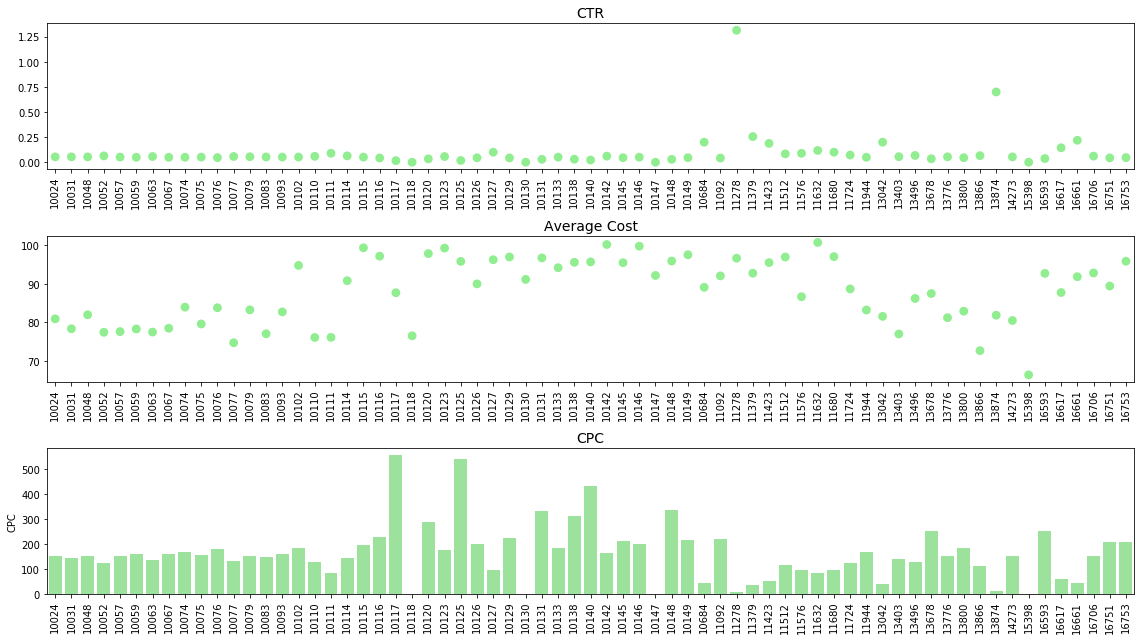

In [62]:
plt.figure(figsize = (16,9))

plt.subplot(3,1,1)
sns.pointplot(x = "Usertag", y = "CTR", data = tags, color = "lightgreen", capsize = 0.2, join = False)
plt.xticks(rotation = 90)
plt.xlabel("")
plt.ylabel("")
plt.title("CTR", fontsize = 14)

plt.subplot(3,1,2)
sns.pointplot(x = "Usertag", y = "Cost", data = tags, color = "lightgreen", capsize = 0.2, join = False)
plt.xticks(rotation = 90)
plt.xlabel("")
plt.ylabel("")
plt.title("Average Cost", fontsize = 14)

plt.subplot(3,1,3)
sns.barplot(x = "Usertag", y = "CPC", data = tags, color = "lightgreen", capsize = 0.2)
plt.xticks(rotation = 90)
plt.xlabel("")
plt.title("CPC", fontsize = 14)

plt.tight_layout()
plt.savefig("Figures/usertag.png")

### Slotprice_cat

In [63]:
train2["slotprice_cat"] = 0
        
train2.loc[ train2["slotprice"] <= 10, "slotprice_cat"] = 0
train2.loc[ (train2["slotprice"] > 10) & (train2["slotprice"] <= 50), "slotprice_cat"] = 1
train2.loc[ (train2["slotprice"] > 50) & (train2["slotprice"] <= 100), "slotprice_cat"] = 2
train2.loc[ train2["slotprice"] > 100, "slotprice_cat"] = 3

In [64]:
data_slotpricecat = Aggregated_CTR(train2, "slotprice_cat")
data_slotpricecat

,slotprice_cat,CTR,Cost,CPC
0,0.0,0.073468,79.889179,108.739933
1,3.0,0.114931,165.048399,143.606778
2,1.0,0.047705,54.846407,114.969448
3,2.0,0.097110,83.859723,86.355233


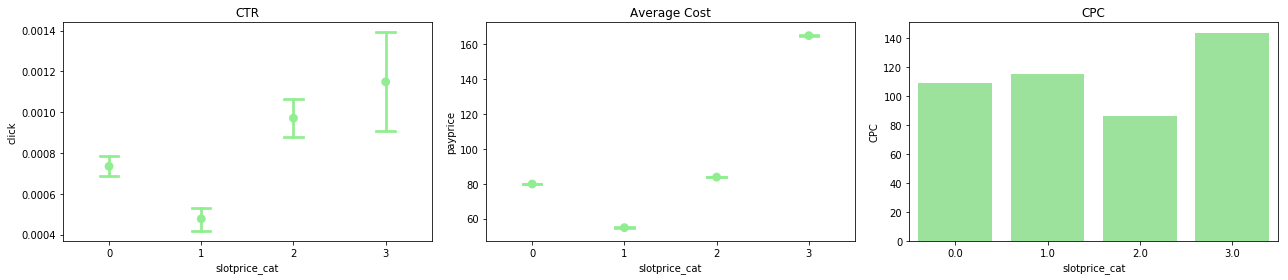

In [65]:
plt.figure(figsize = (18,4))

plt.subplot(1,3,1)
sns.pointplot(x = "slotprice_cat", y = "click", data = train2, color = "lightgreen", capsize = 0.2, join = False)
plt.ylabel("")
plt.title("CTR")

plt.subplot(1,3,2)
sns.pointplot(x = "slotprice_cat", y = "payprice", data = train2, color = "lightgreen", capsize = 0.2, join = False)
plt.ylabel("")
plt.title("Average Cost")

plt.subplot(1,3,3)
sns.barplot(x = "slotprice_cat", y = "CPC", data = data_slotpricecat, color = "lightgreen", capsize = 0.2)
plt.ylabel("")
plt.title("CPC")

plt.tight_layout()

# Statistics per Advertiser

In [66]:
train["advertiser"].value_counts()

1458    492353
3386    455041
3427    402806
3476    310835
3358    264956
2821    211366
2259    133673
2261    110122
2997     49829
Name: advertiser, dtype: int64

In [67]:
advert = train["advertiser"].unique()
advert

array([3427, 2821, 1458, 2259, 3386, 3358, 3476, 2261, 2997])

## Summary Statistics

In [97]:
df = pd.DataFrame(columns = ["Advertiser", "Impressions", "Clicks", "Bids", "Cost", "CTR", "CPC", "CPM"])

In [98]:
i=0

for adv in advert:
    
    # Impressions
    imp = train.loc[ train["advertiser"] == adv ].shape[0]
    
    # Clicks
    clicks = train.loc[ train["advertiser"] == adv ]["click"].sum()
    
    # Bids
    bids = train.loc[ train["advertiser"] == adv ]["bidprice"].sum() / 1000
    
    # Paid
    cost = train.loc[ train["advertiser"] == adv ]["payprice"].sum() / 1000
    
    # CTR
    ctr = clicks*100/imp
    
    # CPC
    cpc = cost/clicks
    
    # CPM
    cpm = cost*1000/imp
    
    # Store results
    df.loc[i] = [round(adv), round(imp), round(clicks), round(bids), round(cost), round(ctr,3), round(cpc,2), round(cpm,2)]
    i+=1

In [99]:
df

,Advertiser,Impressions,Clicks,Bids,Cost,CTR,CPC,CPM
0,3427.0,402806.0,272.0,95219.0,30459.0,0.068,111.98,75.62
1,2821.0,211366.0,131.0,61344.0,18828.0,0.062,143.73,89.08
2,1458.0,492353.0,385.0,147706.0,33969.0,0.078,88.23,68.99
3,2259.0,133673.0,43.0,38508.0,12428.0,0.032,289.03,92.97
4,3386.0,455041.0,320.0,136512.0,34932.0,0.070,109.16,76.77
5,3358.0,264956.0,202.0,61730.0,22447.0,0.076,111.12,84.72
6,3476.0,310835.0,187.0,77042.0,23919.0,0.060,127.91,76.95
7,2261.0,110122.0,36.0,31702.0,9874.0,0.033,274.27,89.66
8,2997.0,49829.0,217.0,13803.0,3129.0,0.435,14.42,62.80


In [113]:
df.to_latex("Figures/advertisers.tex")

In [72]:
def CTR(df, advert = [3427], by = "weekday"):
    
    # Advertisers
    #advert = df["advertiser"].unique()
    
    # Unique features
    feat = df[by].unique()
    
    # Create dataframe
    res = pd.DataFrame(columns = ["Advertiser", by, "CTR"])
    i = 0
    
    for adv in advert:
        
        for f in feat:
            
            df_ = df.loc[ (df["advertiser"] == adv) & (df[by] == f)]
        
            # Number of impressions
            impr = df_.shape[0]
    
            # Number of clicks
            clicks = df_["click"].sum()
    
            # CTR
            try:
                ctr = clicks*100/impr
            except ZeroDivisionError:
                ctr = 0
            
            res.loc[i] = [adv, f, ctr]
            i+=1
        
    
    return res

### Weekday

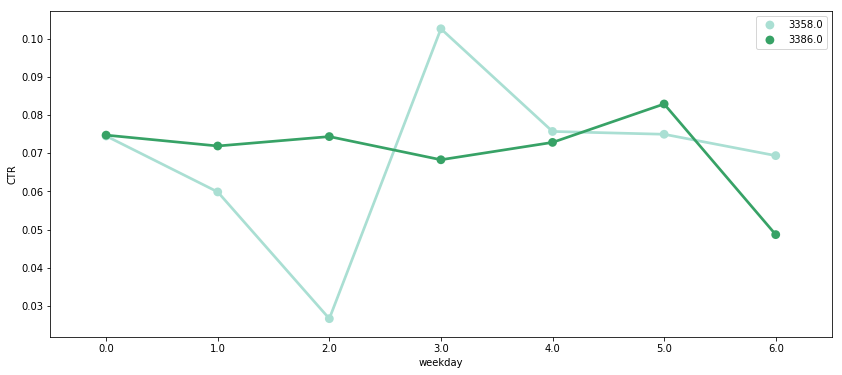

In [73]:
plt.figure(figsize = (14,6))
sns.pointplot(x = "weekday", y = "CTR", hue = "Advertiser", 
              data = CTR(train, advert[4:6], by = "weekday"), 
              size = 6, 
              palette="BuGn")
plt.legend(loc = "best")

### Hour

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

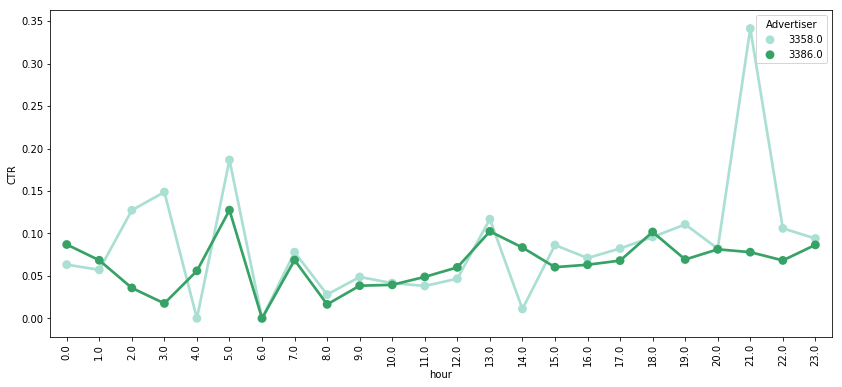

In [74]:
plt.figure(figsize = (14,6))
sns.pointplot(x = "hour", y = "CTR", hue = "Advertiser", 
              data = CTR(train, advert[4:6], by = "hour"), 
              size = 6,
              palette="BuGn")
plt.xticks(rotation = 90)

### OS

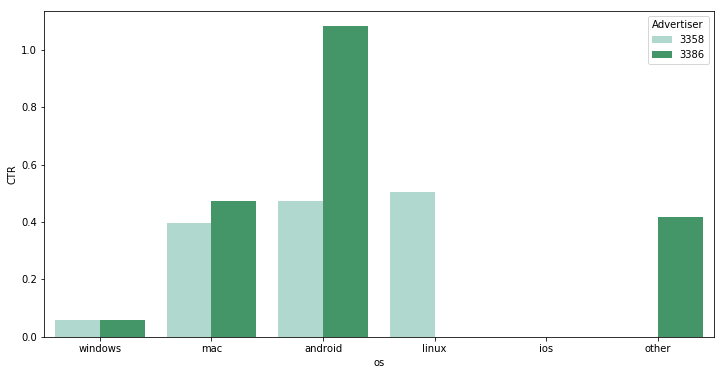

In [75]:
plt.figure(figsize = (12,6))
sns.barplot(x = "os", y="CTR", hue = "Advertiser", 
            data = CTR(train, advert[4:6], by = "os"),
            palette="BuGn")

### Browser

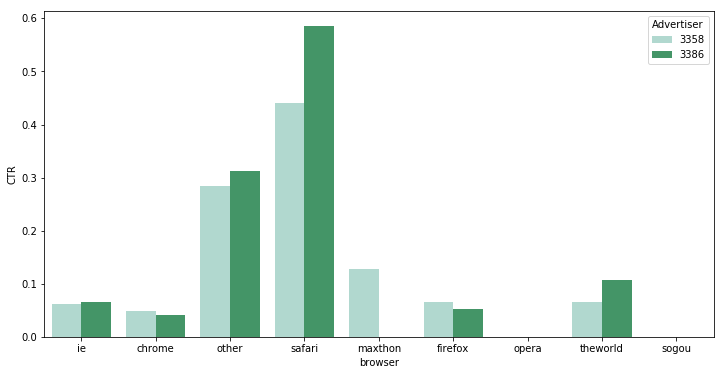

In [76]:
plt.figure(figsize = (12,6))
sns.barplot(x = "browser", y="CTR", hue = "Advertiser", 
            data = CTR(train, advert[4:6], by = "browser"), 
            palette="BuGn")

### Slot Area

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:27: RuntimeWarning: invalid value encountered in long_scalars


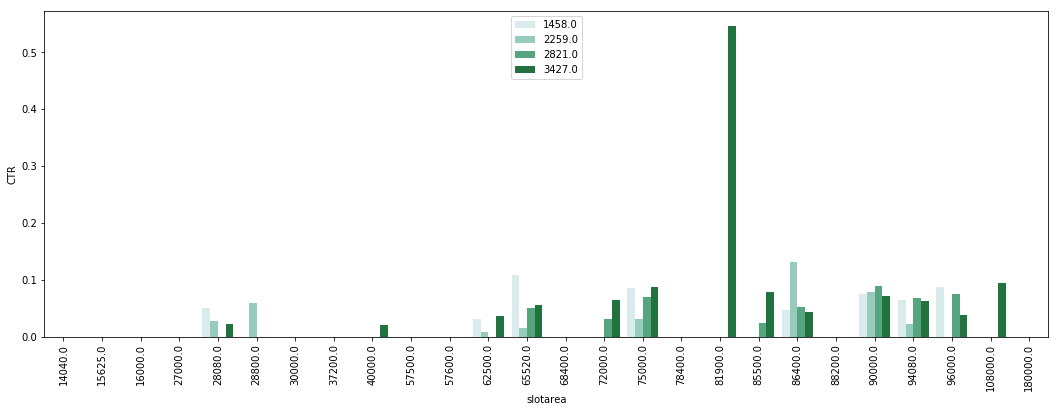

In [77]:
plt.figure(figsize = (18,6))
sns.barplot(x = "slotarea", y="CTR", hue = "Advertiser", 
            data = CTR(train, advert[:4], by = "slotarea"),
            palette="BuGn")
plt.xticks(rotation = 90)
plt.legend(loc = "best")

### Slot Visibility

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:27: RuntimeWarning: invalid value encountered in long_scalars


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

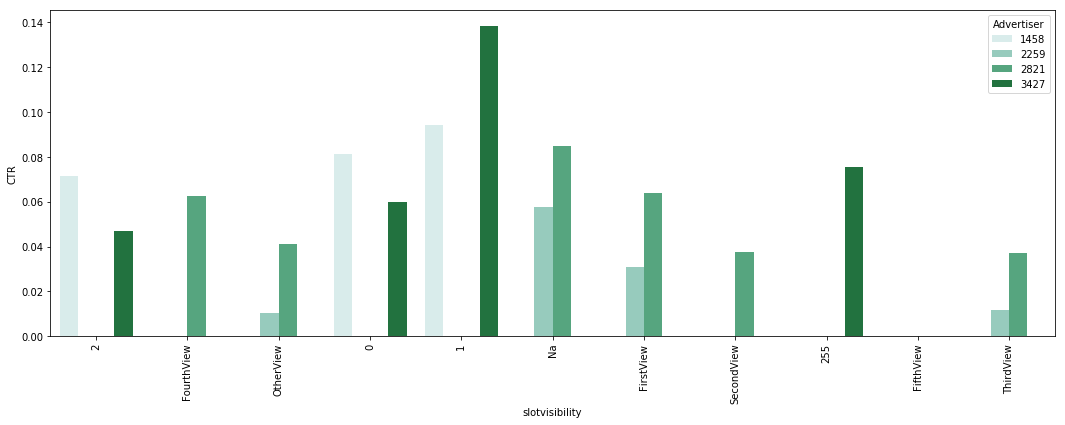

In [78]:
plt.figure(figsize = (18,6))
sns.barplot(x = "slotvisibility", y="CTR", hue = "Advertiser",
            data = CTR(train, advert[:4], by = "slotvisibility"),
            palette="BuGn")
plt.xticks(rotation = 90)

### Ad-exchange

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:27: RuntimeWarning: invalid value encountered in long_scalars


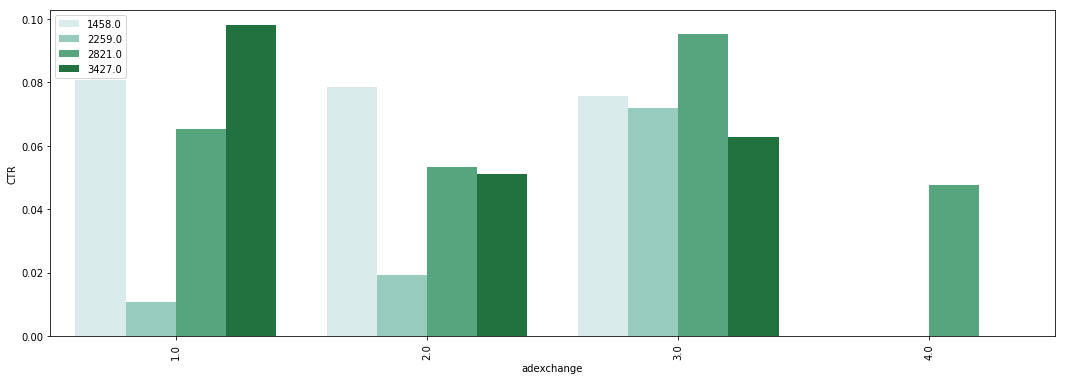

In [79]:
plt.figure(figsize = (18,6))
sns.barplot(x = "adexchange", y="CTR", hue = "Advertiser", 
            data = CTR(train, advert[:4], by = "adexchange"),
            palette="BuGn")
plt.xticks(rotation = 90)
plt.legend(loc = "best")

In [80]:
end = time.time()

In [81]:
print("Total Execution time: {} mins".format((end-start)/60))

Total Execution time: 28.430801502863567 mins
